# Inferential Statistics

In [38]:
import random, pylab

## Roulette Class

Let's go through and make of every attribute and function in this roulette class.

- `__init__` has:
    - `self.pockets` an instance attribute containing every 'pocket' that would appear in aroulette wheel.
    - `self.ball` is set to `None` because the game begins without a ball on the table, it will be assigned a pocket number it lands in.
    - `self.blackOdds` and `self.redOdds` are both set to 1.0, aka 100%
    - `self.pockectOdds` equals 1 less than length of total number of pockets, becasue the ball will only land in one pocket
    
- `self.spin` simulates a spin of the roulette wheel.
- `isBlack` first checks that the ball is an integer and has indeed been spin. 
    - the next two if/else statements return `True` if the ball lands on a pocket colored black and `False` if on a red pocket.

- `isRed` makes sure the ball has been rolled and negates `isBlack` to find if it is red or not.
- `betBlack` takes in an amount of money `amt` and returns money * 1 (the odds of betting black) or else loses the money.
- `betRed` does the same.
        This is likely written to be inherited/modified on the USA and european roulette tables.
- `betPocket` pays out 36x times the `amt`
- `__str__` prints out the name of this class, "Fair Roulette"

In [7]:
class FairRoulette():
    def __init__(self):
        self.pockets = []
        for i in range(1,37):
            self.pockets.append(i)
        self.ball = None
        self.blackOdds, self.redOdds = 1.0, 1.0
        self.pocketOdds = len(self.pockets) - 1.0
    def spin(self):
        self.ball = random.choice(self.pockets)
    def isBlack(self):
        if type(self.ball) != int:
            return False
        if ((self.ball > 0 and self.ball <= 10)\
            or (self.ball>18 and self.ball<=28)):
            return self.ball%2 == 0
        else:
            return self.ball%2 == 1
    def isRed(self):
        return type(self.ball) == int and not self.isBlack()
    def betBlack(self, amt):
        if self.isBlack():
            return amt*self.blackOdds
        else: return -amt
    def betRed(self, amt):
        if self.isRed():
            return amt*self.redOdds
        else: return -amt*self.redOdds
    def betPocket(self, pocket, amt):
        if str(pocket) == str(self.ball):
            return amt*self.pocketOdds
        else: return -amt
    def __str__(self):
        return 'Fair Roulette'


#  playRoulette Function

This function simulates any class type of roulette, for a given number of spins, and a bet size of 1. It prints out the expected treturn if the user bet red, black , or lucky number.

In [ ]:
def playRoulette(game, numSpins, toPrint = True):
    luckyNumber = '2'
    bet = 1
    totRed, totBlack, totPocket = 0.0, 0.0, 0.0
    for i in range(numSpins):
        game.spin()
        totRed += game.betRed(bet)
        totBlack += game.betBlack(bet)
        totPocket += game.betPocket(luckyNumber, bet)
    if toPrint:
        print(numSpins, 'spins of', game)
        print('Expected return betting red =',
              str(100*totRed/numSpins) + '%')
        print('Expected return betting black =', 
              str(100*totBlack/numSpins) + '%')
        print('Expected return betting', luckyNumber, '=',\
              str(100*totPocket/numSpins) + '%\n')
    return (totRed/numSpins, totBlack/numSpins, totPocket/numSpins)

This runs the `playRoulette` function 1,000,000 times. As you can see, the odds of getting red or black are near zero. In this case, the actual odds are converging towards zero. But what about betting a lucky number? Since there are 37 slots, it would converge closer and closer to (1/37) which is roughly ~ 2.7027%

In [54]:
numSpins = 1000000
game = FairRoulette()
playRoulette(game, numSpins)

1000000 spins of Fair Roulette
Expected return betting red = 0.0076%
Expected return betting black = -0.0076%
Expected return betting 2 = -0.0172%



(7.6e-05, -7.6e-05, -0.000172)

## Roulette Subclasses

European Roulette has an additional pocket that is neither balck nor red. When players land on this the money goes to the house.

In [52]:
class EuRoulette(FairRoulette):
    def __init__(self):
        FairRoulette.__init__(self)
        self.pockets.append('0')
    def __str__(self):
        return 'European Roulette'

Similar to European Rulette, American roulette as two 'house pockets'. 

But I'm not sure how this code works down below.

In [51]:
class AmRoulette(EuRoulette):
    def __init__(self):
        EuRoulette.__init__(self)
        self.pockets.append('00')
    def __str__(self):
        return 'American Roulette'

`findPocketReturn` returns a list of the % chance of getting a pocket for some `numTrials` (number of times to run `playRoulette` func) each with a given `trialSize` (aka number of spins.. aka `numSpins`).

In [50]:
def findPocketReturn(game, numTrials, trialSize, toPrint):
    pocketReturns = []
    for t in range(numTrials):
        trialVals = playRoulette(game, trialSize, toPrint)
        pocketReturns.append(trialVals[2])
    return pocketReturns

The following code runs 3 types of roulette games, with 4 different numbers of spins, then prints the expected returns for betting on a pocket.

By the way, `resultDict` is not used in this block of code.

In [49]:
random.seed(0)
numTrials = 20
resultDict = {}
games = (FairRoulette, EuRoulette, AmRoulette)
for G in games:
    resultDict[G().__str__()] = []
for numSpins in (100, 1000, 10000, 100000):
    print('\nSimulate betting a pocket for', numTrials, 'trials of', numSpins, 'spins each')
    for G in games:
        pocketReturns = findPocketReturn(G(), numTrials, numSpins, False)
        print('Exp. return for', G(), '=', str(100*sum(pocketReturns)/float(len(pocketReturns))) + '%')


Simulate betting a pocket for 20 trials of 100 spins each
Exp. return for Fair Roulette = 6.199999999999998%
Exp. return for European Roulette = -8.200000000000001%
Exp. return for American Roulette = 2.599999999999998%

Simulate betting a pocket for 20 trials of 1000 spins each
Exp. return for Fair Roulette = 4.760000000000002%
Exp. return for European Roulette = -2.4399999999999995%
Exp. return for American Roulette = -9.46%

Simulate betting a pocket for 20 trials of 10000 spins each
Exp. return for Fair Roulette = -1.3060000000000003%
Exp. return for European Roulette = -4.095999999999999%
Exp. return for American Roulette = -5.698000000000001%

Simulate betting a pocket for 20 trials of 100000 spins each
Exp. return for Fair Roulette = 0.7982%
Exp. return for European Roulette = -2.5876000000000006%
Exp. return for American Roulette = -5.134600000000001%


### Get Standard Deviation

This iterates through `X`, some iterable and get the mean of all items `x` in `X` then finds standard deviation.

In [34]:
def getMeanAndStd(X):
    mean = sum(X)/float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    std = (tot/len(X))**0.5
    return mean, std

The following code returns the average % payout for various roulette wheels, betting 20, with various trial numbers of `numSpins` spins, then prints the % returns.

It's still not clear how `resultDict` is being used, but this time, the `numSpins`, mean and std deviation get appended to each game in the dict.

In [65]:
random.seed(0)
numTrials = 20
resultDict = {}
games = (FairRoulette, EuRoulette, AmRoulette)
for G in games:
    resultDict[G().__str__()] = []
for numSpins in (100, 1000, 10000):
    print('\nSimulate betting a pocket for', numTrials,
          'trials of', numSpins, 'spins each')
    for G in games:
        pocketReturns = findPocketReturn(G(), 20, numSpins, False)
        mean, std = getMeanAndStd(pocketReturns)
        resultDict[G().__str__()].append((numSpins, 100*mean, 100*std))
        print('Exp. return for', G(), '=', str(round(100*mean, 3))
              + '%,', '+/- ' + str(round(100*1.96*std, 3))
              + '% with 95% confidence')


Simulate betting a pocket for 20 trials of 100 spins each
Exp. return for Fair Roulette = 6.2%, +/- 152.114% with 95% confidence
Exp. return for European Roulette = -8.2%, +/- 90.567% with 95% confidence
Exp. return for American Roulette = 2.6%, +/- 92.74% with 95% confidence

Simulate betting a pocket for 20 trials of 1000 spins each
Exp. return for Fair Roulette = 4.76%, +/- 39.658% with 95% confidence
Exp. return for European Roulette = -2.44%, +/- 31.31% with 95% confidence
Exp. return for American Roulette = -9.46%, +/- 36.273% with 95% confidence

Simulate betting a pocket for 20 trials of 10000 spins each
Exp. return for Fair Roulette = -1.306%, +/- 9.295% with 95% confidence
Exp. return for European Roulette = -4.096%, +/- 10.902% with 95% confidence
Exp. return for American Roulette = -5.698%, +/- 11.077% with 95% confidence


the following function let's us squirt out a graph based on the dictionary results. It iterates through `resultDict` pulling out every key, then runs a for look on each key, to access the list of values.

For each tuple (aka trial) in `resultDict` it binds the values of:
- `numSpins` to `xVals`
- `mean` to `yVal`
- `std` to `eVals`

then formats and plots the results with pylab.

In [64]:
def plotReturn(resultDict):
    for k in resultDict:
        xVals, yVals, eVals = [], [], []
        for trial in resultDict[k]:
            xVals.append(trial[0])
            yVals.append(trial[1])
            eVals.append(trial[2])
        pylab.errorbar(xVals, yVals, yerr = eVals, label = k, marker = 'o')
    pylab.legend()
    pylab.xlabel('Spins per trial', fontsize = 'x-large')
    pylab.ylabel('Expected percentage return', fontsize = 'x-large')
    pylab.title('Expected Return Betting a Pocket', fontsize = 'x-large')
    pylab.semilogx()
    minX, maxX = pylab.xlim()
    pylab.xlim(1, maxX + 100000)

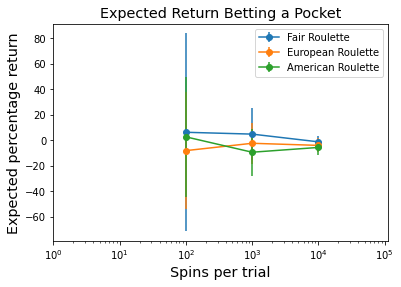

In [62]:
plotReturn(resultDict)
#assert False

`plotMeans` creates and empty list, `means` and iterates through range the size of the rounded-down integer value of `numRolls` / `numDice`

the next for loops rolls the dice and tallies the face values into `vals`
A histogram is then generated with pylab showing `means` as the x value and `numBins` as the Y value.

Finally the mean and standard deviation of all the means gets returned.

In [68]:
def plotMeans(numDice, numRolls, numBins, legend, color, style):
    means = []
    for i in range(numRolls//numDice):
        vals = 0
        for j in range(numDice):
            vals += 5*random.random() 
        means.append(vals/float(numDice))
    pylab.hist(means, numBins, color = color, label = legend,
               weights = pylab.array(len(means)*[1.0])/len(means),
               hatch = style)
    return getMeanAndStd(means)

Mean of rolling 1 die = 2.5034358148091855 Std = 1.442431731346342
Mean of rolling 50 dice = 2.495727482133078 Std = 0.19971726578732749


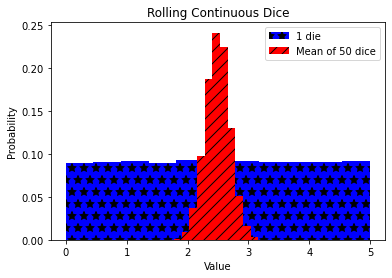

In [69]:
mean, std = plotMeans(1, 100000, 11, '1 die', 'b', '*')
print('Mean of rolling 1 die =', mean, 'Std =', std)
mean, std = plotMeans(50, 100000, 11, 'Mean of 50 dice', 'r', '//')
print('Mean of rolling 50 dice =', mean, 'Std =', std)
pylab.title('Rolling Continuous Dice')
pylab.xlabel('Value')
pylab.ylabel('Probability')
pylab.legend()

`leaveAhead` simulates gambling with a set amount of money, betting all black or red every time.

In [71]:
def leaveAhead(game, stake, bet, numTrials):
    numAhead = 0.0
    for t in range(numTrials):
        bankRoll = stake
        curBet = bet
        while bankRoll > 0 and bankRoll <= 2*stake:
            game.spin()
            outcome = game.betBlack(curBet)
            bankRoll += outcome
            if outcome < 0:
                curBet = min(2*curBet, bankRoll)
            #print curBet, bankRoll
        if bankRoll > stake:
            numAhead += 1
    return numAhead/numTrials

`stake` does not get used??
`bet` is the size of a given bet.
`numTrials` was explained above.

The for loop:
- appends the exponential values of 10 to `stakes`
- `successProb` is a list of the 'ratio of trials where bakroll exceeded stake divided by total trials'.

These get plotted as the x and y axis.

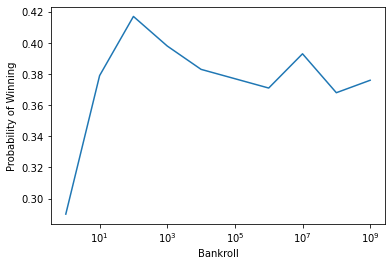

In [81]:
stake = 1
bet = 1
numTrials = 1000
successProb, stakes = [], []
for i in range(10):
    stakes.append(10**i)
    successProb.append(leaveAhead(AmRoulette(), 10**i, bet, numTrials))
pylab.plot(stakes, successProb)
pylab.xlabel('Bankroll')
pylab.ylabel('Probability of Winning')
pylab.semilogx()
pylab.show()